In [ ]:
#Q1 - XOR
def step_function(z):
    return 1 if z >= 1 else 0

weights1 = [[-1, 1], [-1, 1]]
weights2 = [[1, -1]]
bias1 = [0.5, -0.5]
bias2 = [0.5]

X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [[0], [1], [1], [0]]

print("XOR Gate Truth Table:")
print("| X1 | X2 | Output |")
print("|----|----|--------|")
for i in range(len(X)):
    print(f"| {X[i][0]} | {X[i][1]} | {y[i][0]} |")
print("|----|----|--------|")

for i in range(len(X)):
    print(f"\nRow {i+1}:")
    print(f"Input: {X[i]}")

    n1_weighted_sum = X[i][0]*weights1[0][0] + X[i][1]*weights1[0][1] + bias1[0]
    n2_weighted_sum = X[i][0]*weights1[1][0] + X[i][1]*weights1[1][1] + bias1[1]
    print(f"N1 Weighted Sum: {n1_weighted_sum}")
    print(f"N2 Weighted Sum: {n2_weighted_sum}")
    n1 = step_function(n1_weighted_sum)
    n2 = step_function(n2_weighted_sum)
    print(f"N1 Output: {n1}")
    print(f"N2 Output: {n2}")

    o1_weighted_sum = n1*weights2[0][0] + n2*weights2[0][1] + bias2[0]
    print(f"O1 Weighted Sum: {o1_weighted_sum}")
    o1 = step_function(o1_weighted_sum)
    print(f"O1 Output: {o1}")

    print(f"Expected Output: {y[i][0]}")
    print(f"Actual Output: {o1}")

XOR Gate Truth Table:
| X1 | X2 | Output |
|----|----|--------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |
|----|----|--------|

Row 1:
Input: [0, 0]
N1 Weighted Sum: 0.5
N2 Weighted Sum: -0.5
N1 Output: 0
N2 Output: 0
O1 Weighted Sum: 0.5
O1 Output: 0
Expected Output: 0
Actual Output: 0

Row 2:
Input: [0, 1]
N1 Weighted Sum: 1.5
N2 Weighted Sum: 0.5
N1 Output: 1
N2 Output: 0
O1 Weighted Sum: 1.5
O1 Output: 1
Expected Output: 1
Actual Output: 1

Row 3:
Input: [1, 0]
N1 Weighted Sum: -0.5
N2 Weighted Sum: -1.5
N1 Output: 0
N2 Output: 0
O1 Weighted Sum: 0.5
O1 Output: 0
Expected Output: 1
Actual Output: 0

Row 4:
Input: [1, 1]
N1 Weighted Sum: 0.5
N2 Weighted Sum: -0.5
N1 Output: 0
N2 Output: 0
O1 Weighted Sum: 0.5
O1 Output: 0
Expected Output: 0
Actual Output: 0


In [ ]:
#Q1 - XOR
import numpy as np

def stepfun(a):
    return 1 if a >= 0 else 0

class Perceptron:
    def __init__(self):
        self.weights = np.array([0.0, 0.0])
        self.bias = 0.001
    def predict(self, input_X):
        weighted_sum = np.dot(input_X, self.weights) + self.bias
        output = stepfun(weighted_sum)
        return output

    def train(self, inputs, target_outputs, epochs=10, learning_rate=0.1):
        for epoch in range(epochs):
            for input_X, desired_output in zip(inputs, target_outputs):
                predicted_output = self.predict(input_X)
                error = desired_output - predicted_output
                self.weights += learning_rate * error * input_X
                self.bias += learning_rate * error
            print(f"Epoch {epoch+1}: Weights: {self.weights}, Bias: {self.bias}")

perceptron = Perceptron()

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_outputs_xor = np.array([0, 1, 1, 0])

perceptron.train(inputs, target_outputs_xor, epochs=10, learning_rate=0.1)

print("\nTesting the trained perceptron:")
for input1, desired_output in zip(inputs, target_outputs_xor):
    predicted_output = perceptron.predict(input1)
    print(f"Input: {input1} \nPredicted Output: {predicted_output} \nDesired Output: {desired_output}\n")


Epoch 1: Weights: [-0.1  0. ], Bias: -0.099
Epoch 2: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 3: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 4: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 5: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 6: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 7: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 8: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 9: Weights: [-0.1  0. ], Bias: 0.0010000000000000009
Epoch 10: Weights: [-0.1  0. ], Bias: 0.0010000000000000009

Testing the trained perceptron:
Input: [0 0] 
Predicted Output: 1 
Desired Output: 0

Input: [0 1] 
Predicted Output: 1 
Desired Output: 1

Input: [1 0] 
Predicted Output: 0 
Desired Output: 1

Input: [1 1] 
Predicted Output: 0 
Desired Output: 0



In [ ]:
# Q2 - MLP Accuracy
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc:.2f}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8839 - loss: 0.4120
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9749 - loss: 0.0843
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9837 - loss: 0.0491
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9900 - loss: 0.0320
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9912 - loss: 0.0274
Test accuracy: 0.98


Q3 - Handwritten Digit

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5110 - loss: 2.5837 - val_accuracy: 0.2127 - val_loss: 3.6975
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1996 - loss: 3.7516 - val_accuracy: 0.2038 - val_loss: 3.7312
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1875 - loss: 3.7983 - val_accuracy: 0.2296 - val_loss: 3.6289
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2173 - loss: 3.6808 - val_accuracy: 0.1638 - val_loss: 3.8936
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1726 - loss: 3.8595 - val_accuracy: 0.1518 - val_loss: 3.9429
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1742 - loss: 3.8565 - val_accuracy: 0.1579 - val_loss: 3.9195
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1500 - loss: 3.9470 - val_accuracy: 0.1267 - val_loss: 4.0459
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1311 - loss: 4.0580 - val_accurac

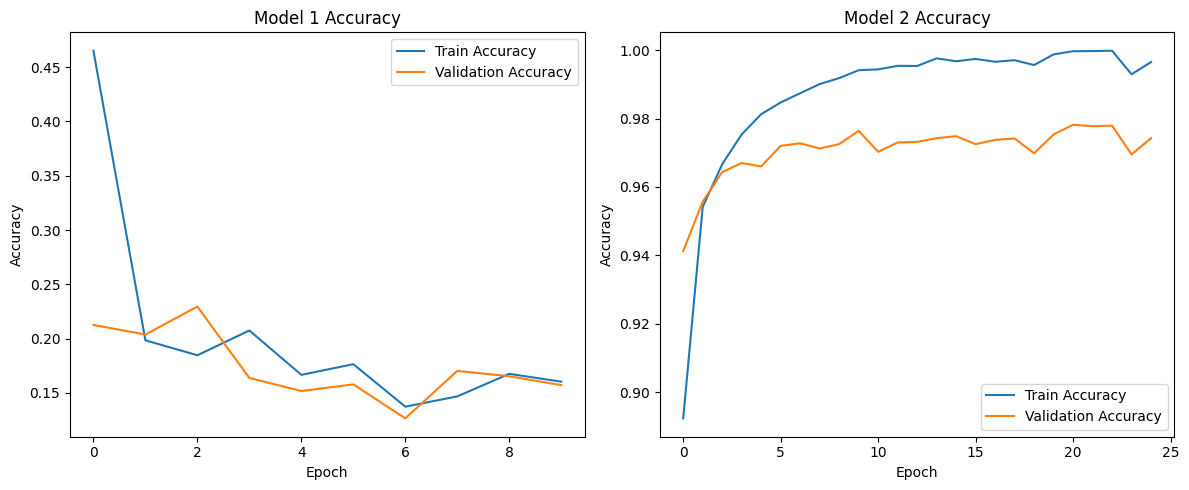

In [ ]:
# Q3 - Handwritten Digit

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data for CNN (28x28 images with 1 channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Model 1: 1 Flatten layer and 2 Dense layers with ReLU activation
model1 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

])

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

# Evaluate Model 1
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
print(f'Model 1 Test accuracy: {test_acc1:.2f}')

# Model 2: 1 Flatten layer and 3 Dense layers with ReLU activation
model2 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1, validation_split=0.2)

# Evaluate Model 2
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print(f'Model 2 Test accuracy: {test_acc2:.2f}')

# Optional: Plot training history for both models
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Model 1 training history
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 1 Accuracy')
plt.legend()

# Plot Model 2 training history
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 2 Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 57024.4414 - val_loss: 51594.4062
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50096.1094 - val_loss: 35093.9258
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30170.1777 - val_loss: 15108.0693
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13669.2568 - val_loss: 10340.8604
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9823.0820 - val_loss: 8977.1904
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8570.3193 - val_loss: 8087.6929
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7615.4971 - val_loss: 7382.2314
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6957.1221 - val_loss: 6800.1060
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6766.7808 - val_loss: 6296.9912
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5835.3350 - val_loss: 5892.6133
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5369.3394 - val_loss: 5571.8667
Epoch 12/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 55679.8711 - val_loss: 51696.0352
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50585.5469 - val_loss: 36746.3281
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31417.0176 - val_loss: 16461.6484
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15697.7217 - val_loss: 11062.1025
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12451.4326 - val_loss: 9644.5654
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11083.7031 - val_loss: 8654.1875
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9516.9287 - val_loss: 7916.9233
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9611.7900 - val_loss: 7376.4785
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9022.9053 - val_loss: 6805.4316
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8164.8052 - val_loss: 6331.2646
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7656.1968 - val_loss: 5951.3271
Epoch 12

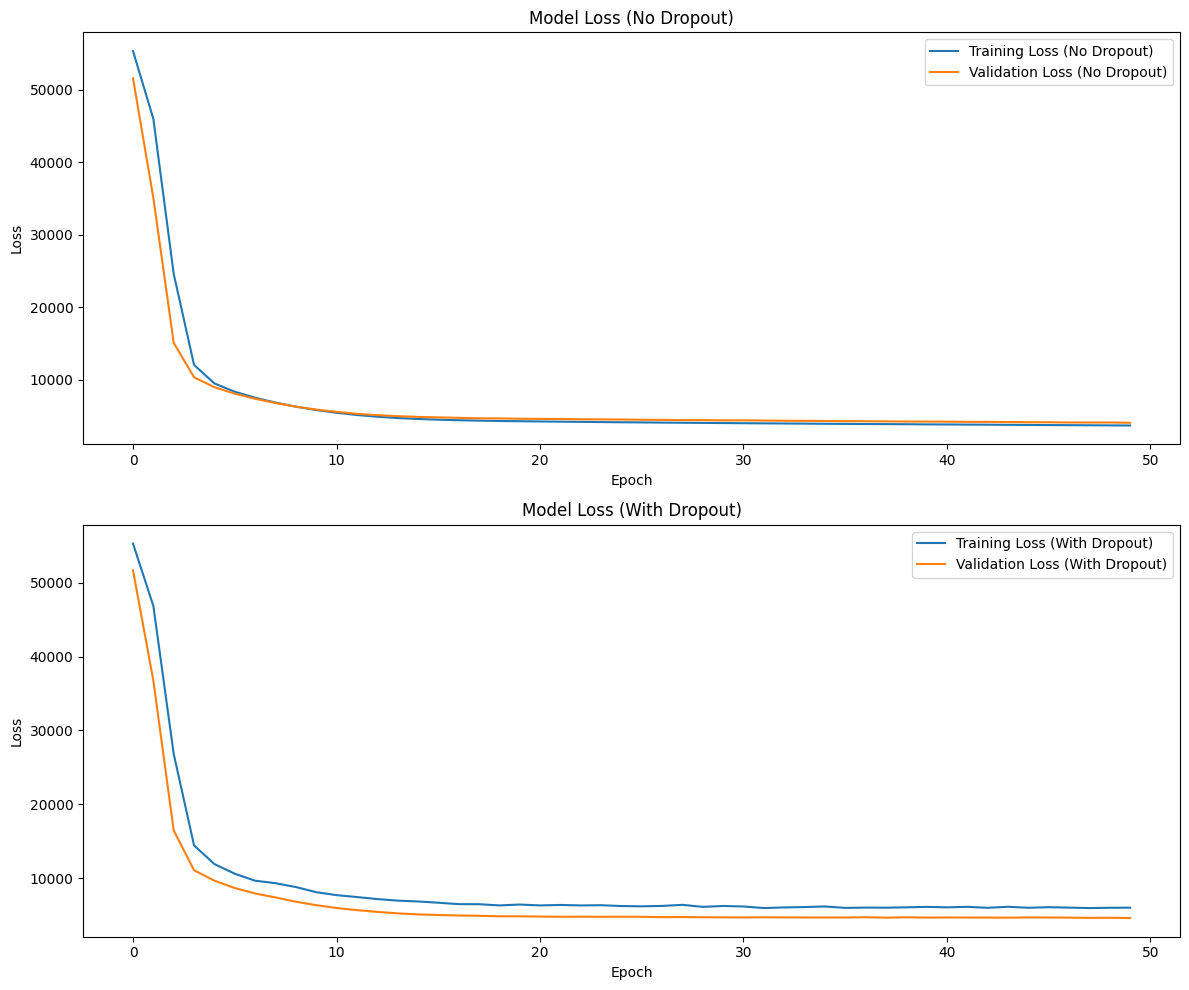


Model Summary (No Dropout):


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)


Model Summary (With Dropout):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

In [ ]:
# Q4 - Regression Analysis - California
from google.colab import files
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Upload the dataset
#uploaded = files.upload()

# Load the dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Display the first few rows of the dataframe
print(df.head())

# Drop rows with missing values in 'median_house_value'
df = df.dropna(subset=['median_house_value'])

# Convert 'median_house_value' to thousands
df['median_house_value'] = df['median_house_value'] / 1000

# Define features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and compile the model without dropout
model_no_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_no_dropout.compile(optimizer='adam', loss='mean_squared_error')

# Train the model without dropout
history_no_dropout = model_no_dropout.fit(
    X_train_scaled, y_train,
    batch_size=128,
    epochs=50,
    verbose=1,
    validation_split=0.2
)

# Evaluate the model without dropout
mse_no_dropout = model_no_dropout.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nMean Squared Error (No Dropout) on test data: {mse_no_dropout:.2f}')

# Make predictions with the model without dropout
predictions_no_dropout = model_no_dropout.predict(X_test_scaled)
print("First few predictions (No Dropout):")
print(predictions_no_dropout[:5])

# Define and compile the model with dropout
model_with_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Dropout layer with a rate of 30%
    Dense(32, activation='relu'),
    Dropout(0.3),  # Dropout layer with a rate of 30%
    Dense(1)
])

model_with_dropout.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with dropout
history_with_dropout = model_with_dropout.fit(
    X_train_scaled, y_train,
    batch_size=128,
    epochs=50,
    verbose=1,
    validation_split=0.2
)

# Evaluate the model with dropout
mse_with_dropout = model_with_dropout.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nMean Squared Error (With Dropout) on test data: {mse_with_dropout:.2f}')

# Make predictions with the model with dropout
predictions_with_dropout = model_with_dropout.predict(X_test_scaled)
print("First few predictions (With Dropout):")
print(predictions_with_dropout[:5])

# Plot training loss for both models
plt.figure(figsize=(12, 10))

# Plot for model without dropout
plt.subplot(2, 1, 1)
plt.plot(history_no_dropout.history['loss'], label='Training Loss (No Dropout)')
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss (No Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss (No Dropout)')
plt.legend()

# Plot for model with dropout
plt.subplot(2, 1, 2)
plt.plot(history_with_dropout.history['loss'], label='Training Loss (With Dropout)')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss (With Dropout)')
plt.legend()

plt.tight_layout()
plt.show()

# Display model summaries
print("\nModel Summary (No Dropout):")
model_no_dropout.summary()

print("\nModel Summary (With Dropout):")
model_with_dropout.summary()


Epoch Value: 5.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6774 - loss: 1.3157 - val_accuracy: 0.9144 - val_loss: 0.3239
Epoch 2/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9156 - loss: 0.3088 - val_accuracy: 0.9348 - val_loss: 0.2274
Epoch 3/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9364 - loss: 0.2187 - val_accuracy: 0.9462 - val_loss: 0.1870
Epoch 4/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9502 - loss: 0.1708 - val_accuracy: 0.9538 - val_loss: 0.1609
Epoch 5/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9573 - loss: 0.1456 - val_accuracy: 0.9586 - val_loss: 0.1434

Test Accuracy: 0.9566
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy Score: 0.9566


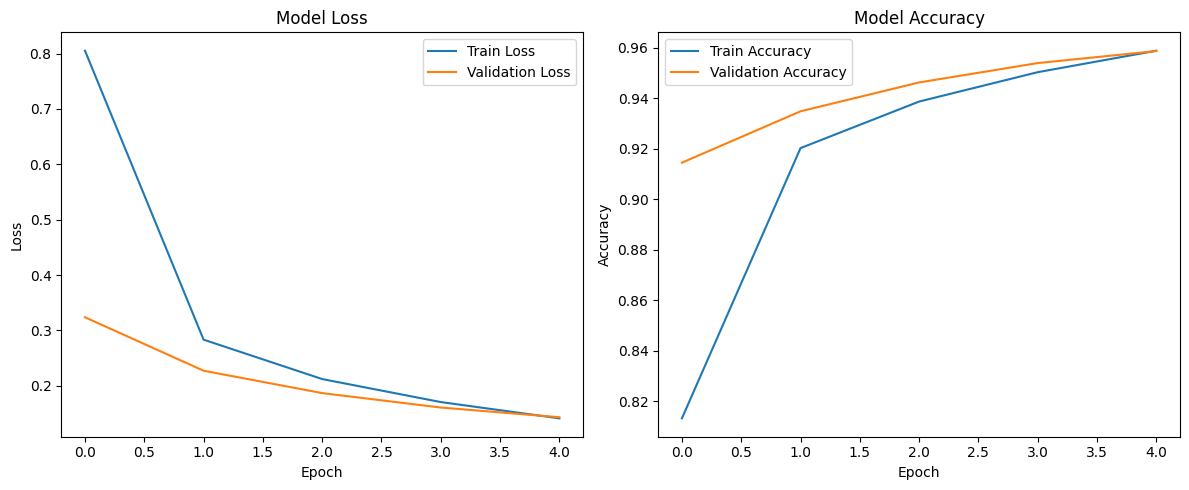

In [ ]:
#Q5

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Calculate the number of epochs
n_iters = 3000
batch_size = 100
epoch_value = n_iters / (len(x_train) / batch_size)
print(f'Epoch Value: {epoch_value}')

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=int(epoch_value), batch_size=batch_size, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy Score: {accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 0.7161
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2500 - loss: 0.7061
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2500 - loss: 0.7005
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.6982
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6957
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6929
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.6899
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5000 - loss: 0.6873
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6856
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.6837
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.6817
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6797
Epo

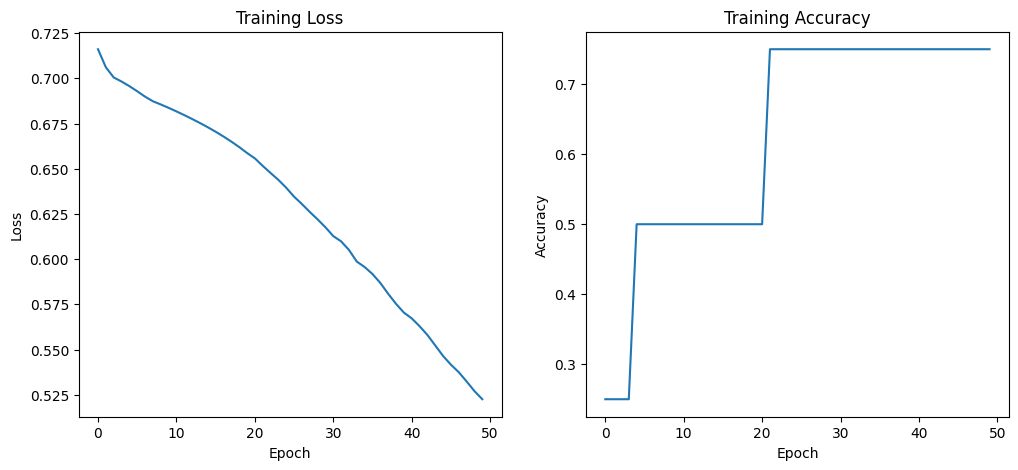

In [ ]:
# BQ1 - XNOR
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[1],
              [0],
              [0],
              [1]])

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=50, verbose=1)

loss, accuracy = model.evaluate(X, y, verbose=0)
print(f'\nLoss: {loss:.4f}, Accuracy: {accuracy:.4f}')

predictions = model.predict(X)
predictions = np.round(predictions)

print("\nPredictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} - Predicted Output: {predictions[i][0]}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.show()


SET B Q1

SET B

Epoch Value: 5.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8473 - loss: 0.5207 - val_accuracy: 0.9409 - val_loss: 0.2011
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9397 - loss: 0.1966 - val_accuracy: 0.9382 - val_loss: 0.2032
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9490 - loss: 0.1668 - val_accuracy: 0.9542 - val_loss: 0.1536
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9552 - loss: 0.1435 - val_accuracy: 0.9563 - val_loss: 0.1467
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9584 - loss: 0.1318 - val_accuracy: 0.9581 - val_loss: 0.1393

Test Accuracy: 0.9569
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


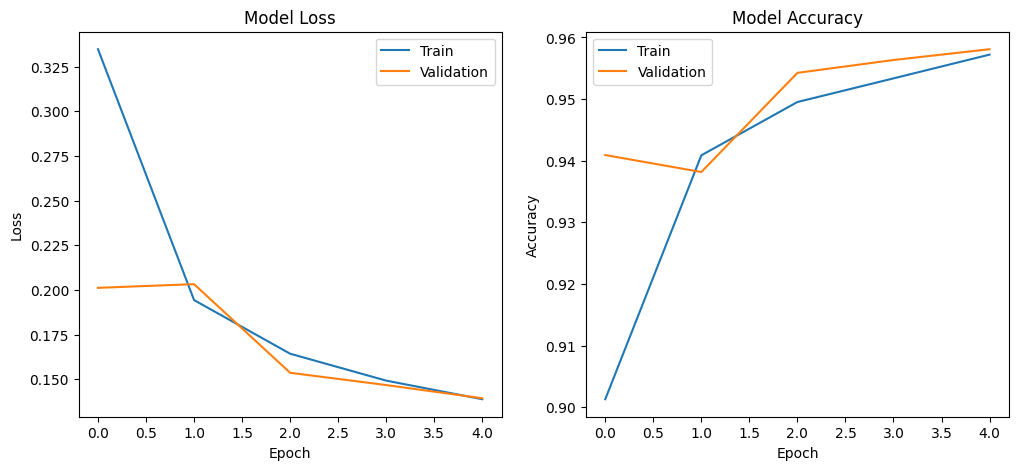

In [ ]:
# BQ2 - Feed Forward Tanh
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0 * 2 - 1
x_test = x_test / 255.0 * 2 - 1

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

n_iters = 3000
batch_size = 100
epoch_value = n_iters / (len(x_train) / batch_size)
print(f'Epoch Value: {epoch_value}')

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=int(epoch_value),
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {accuracy:.4f}')

predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


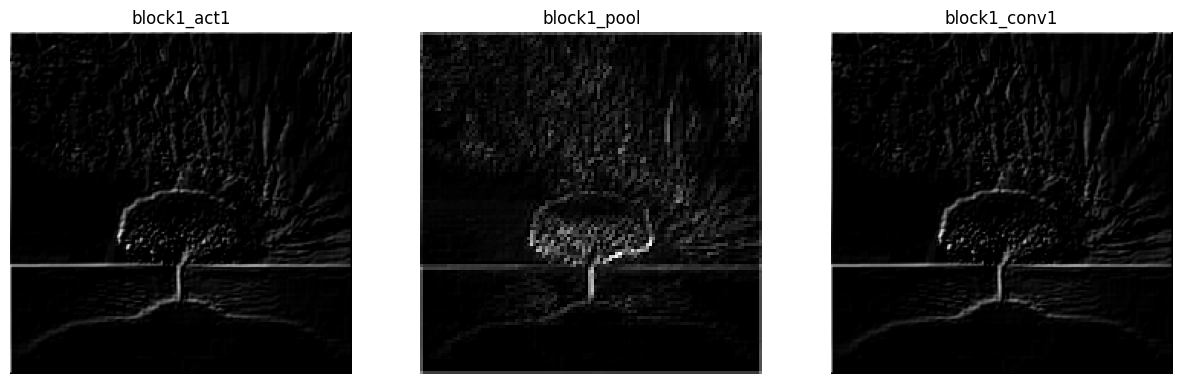